# I Solving the Sum of Two Digits Programming Challenge

## C++

In [1]:
%%writefile sum.cpp
#include <iostream>

int sum_of_two_digits(int first_digit, int second_digit) {
    return first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing sum.cpp


In [2]:
!g++ sum.cpp -o sum
!./sum

4 3
7

**Group 14 solution**


We take into account that the sum of the greatest input overflows the c++ interger datatype. Therefore, we change the result datatype to *long long*

In [3]:
%%writefile sum_efficient.cpp
#include <iostream>

long long sum_of_two_digits(int first_digit, int second_digit) {
    return (long long)first_digit + second_digit;
}

int main() {
    int a = 0;
    int b = 0;
    std::cin >> a;
    std::cin >> b;
    std::cout << sum_of_two_digits(a, b);
    return 0;
}

Writing sum_efficient.cpp


In [4]:
!g++ sum_efficient.cpp -o sum_efficient
!./sum_efficient

9 8
17

### Test input output files

Testing with a small input

In [5]:
%%writefile input1.txt
4 8

Writing input1.txt


In [6]:
%%writefile output1.txt
12

Writing output1.txt


In [7]:
!./sum < input1.txt

12

In [8]:
!./sum_efficient < input1.txt

12

Second test: negative numbers

In [9]:
%%writefile input2.txt
-5 9

Writing input2.txt


In [10]:
%%writefile output2.txt
4

Writing output2.txt


In [11]:
!./sum < input2.txt

4

In [12]:
!./sum_efficient < input2.txt

4

Our example: biggest intergers test

In [13]:
%%writefile input3.txt
2147483647 2147483647

Writing input3.txt


In [14]:
%%writefile output3.txt
4294967294

Writing output3.txt


In [15]:
!./sum < input3.txt

-2

In [16]:
!./sum_efficient < input3.txt

4294967294

### Comparing files with grep

https://askubuntu.com/questions/546796/comparing-two-text-files

In [17]:
!grep -xvFf output1.txt output1.txt 

In [18]:
!grep -xvFf output1.txt output2.txt 

4


In [19]:
!grep -xvFf output2.txt output1.txt 

12


Comparing the expected outputs for the naive solution

In [20]:
!./sum < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

In [21]:
!./sum < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

In [22]:
!./sum < input3.txt> ctest3.txt
!grep -xvFf output3.txt ctest3.txt

-2


Comparing the expected outputs for the efficient solution

In [23]:
!./sumEfficient < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

/bin/bash: ./sumEfficient: No such file or directory


In [24]:
!./sumEfficient < input2.txt > ctest2.txt
!grep -xvFf output2.txt ctest2.txt

/bin/bash: ./sumEfficient: No such file or directory


In [25]:
!./sumEfficient< input3.txt> ctest3.txt
!grep -xvFf output3.txt ctest3.txt

/bin/bash: ./sumEfficient: No such file or directory


## Python

In [26]:
%%writefile sum.py
# python3


def sum_of_two_digits(first_digit, second_digit):
    return first_digit + second_digit

if __name__ == '__main__':
    a, b = map(int, input().split())
    print(sum_of_two_digits(a, b))

Writing sum.py


In [27]:
!python sum.py

7 5
12


Testing with a small input

In [28]:
!python sum.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

Second test: negative numbers

In [29]:
!python sum.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

Our example: biggest intergers test. As we can observe no overflow occurs on python, this happens because there is no limit of the interger value in python language

In [30]:
!python sum.py  < input3.txt> ptest3.txt
!grep -xvFf output3.txt ptest3.txt

# II Solving The Maximum Pairwise Product Programming Challenge in C++

## C++

In [31]:
%%writefile max_pairwise_product.cpp
#include <iostream>
#include <vector>
#include <algorithm>

int MaxPairwiseProduct(const std::vector<int>& numbers) {
    int max_product = 0;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
            max_product = std::max(max_product,
                numbers[first] * numbers[second]);
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product.cpp


In [32]:
!g++ max_pairwise_product.cpp -o max_pairwise_product
!./max_pairwise_product

3
1 4 5
20


### Test 1: small numbers

In [33]:
%%writefile input1.txt
6
1 2 3 4 5 6

Overwriting input1.txt


In [34]:
%%writefile output1.txt
30

Overwriting output1.txt


In [35]:
!./max_pairwise_product < input1.txt

30


In [36]:
!./max_pairwise_product  < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

### Test 2: lagest input numbers 200000 200000 in the input

In [37]:
%%writefile input2.txt
6
1 3 200000 9 200000 23

Overwriting input2.txt


In [38]:
%%writefile output2.txt
40000000000

Overwriting output2.txt


In [39]:
!./max_pairwise_product < input2.txt

1345294336


In [40]:
!./max_pairwise_product1  < input2.txt> ctest2.txt
!grep -xvFf output2.txt ctest2.txt

/bin/bash: ./max_pairwise_product1: No such file or directory


As we could observe, the expected product is differerent from the expected output. This occurs beause the expected output *40000000000* overflows c++ interger datatype

In [41]:
%%writefile max_pairwise_product_improved.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max_product = 0LL;
	  long long aux_product = 0LL;
    int n = numbers.size();

    for (int first = 0; first < n; ++first) {
        for (int second = first + 1; second < n; ++second) {
			       aux_product =  (long long) numbers[first] * numbers[second];
            if ( max_product < aux_product)  {
				        max_product = aux_product;
             }
        }
    }

    return max_product;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_improved.cpp


Note that if we change the *int* data type to *long long*, the overflow doesn't occur, due to it's 8 bytes data size

In [42]:
!g++ max_pairwise_product_improved.cpp -o max_pairwise_product_improved
!./max_pairwise_product_improved

2
2 6
12


###Test 1: small numbers

In [43]:
!./max_pairwise_product_improved < input1.txt

30


In [44]:
!./max_pairwise_product_improved < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

### Test 2: lagest input numbers 200000 200000 in the input

In [45]:
!./max_pairwise_product_improved < input2.txt

40000000000


In [46]:
!./max_pairwise_product_improved  < input2.txt> ctest2.txt
!grep -xvFf output2.txt ctest2.txt

### Test 3  generate a tests file with the maximum n 200000 numbres and measure time

In [47]:
%%writefile generate200k.cpp
#include <iostream>
#include <time.h>
int generate200k(){
  srand (time(NULL));
  std::cout << 200000<<"\n";
    for(int i=0;i<200000;i++){
        int random = rand() %(200000 + 1);
        std::cout << random<< " ";
    }
}


int main() {
    generate200k();
    return 0;
}

Writing generate200k.cpp


We write the file *input200kData.txt* containing 200000 random numbers between 1 and 2000000, and then measure time

In [48]:
!g++ generate200k.cpp -o 200kdata
!./200kdata > input200kData.txt

In [49]:
%time !./max_pairwise_product_improved < input200kData.txt

40000000000
CPU times: user 969 ms, sys: 160 ms, total: 1.13 s
Wall time: 2min 16s


### Efficient solution 

In [50]:
%%writefile max_pairwise_product_efficient.cpp
#include <iostream>
#include <vector>
#include <algorithm>

long long MaxPairwiseProduct(const std::vector<int>& numbers) {
    long long max = 0;
    long long max2 = 0;
    int n = numbers.size();

    for (int i = 0; i < n; ++i) {
        if (max<numbers[i]){
            max2 = max;
            max = numbers[i];
        }
        else if(max2<numbers[i]){
            max2 = numbers[i];
        }
    }

    return (long long) max*max2;
}

int main() {
    int n;
    std::cin >> n;
    std::vector<int> numbers(n);
    for (int i = 0; i < n; ++i) {
        std::cin >> numbers[i];
    }

    std::cout << MaxPairwiseProduct(numbers) << "\n";
    return 0;
}


Writing max_pairwise_product_efficient.cpp


In [51]:
!g++ max_pairwise_product_efficient.cpp -o max_pairwise_product_efficient
!./max_pairwise_product_efficient

4
2 6 5 3
30


### Test 1: small numbers

In [52]:
!./max_pairwise_product_efficient < input1.txt

30


In [53]:
!./max_pairwise_product_efficient < input1.txt> ctest1.txt
!grep -xvFf output1.txt ctest1.txt

### Test 2: lagest input numbers 200000 200000 in the input

In [54]:
!./max_pairwise_product_efficient < input2.txt

40000000000


In [55]:
!./max_pairwise_product_efficient < input2.txt> ctest2.txt
!grep -xvFf output2.txt ctest2.txt

### Test 3: input with the maximum n 200000 numbres and measure time

In [56]:
%time !./max_pairwise_product_efficient < input200kData.txt

40000000000
CPU times: user 10.1 ms, sys: 5.38 ms, total: 15.5 ms
Wall time: 119 ms


This solution takes less time because it goes through the array only once, instead of having a quadratic complexity like last solution

## Python

###Naive solution

In [57]:
%%writefile maximum_product.py
# python3
def max_product(numbers):
    n = len(numbers)
    max_product = 0
    for first in range(n):
        for second in range(first + 1, n):
            max_product = max(max_product,
                numbers[first] * numbers[second])

    return max_product

n = int(input())
numbers = [int(x) for x in input().split()]
print(max_product(numbers))




Writing maximum_product.py


###Test 1: small numbers

In [58]:
!python maximum_product.py < input1.txt

30


In [59]:
!python maximum_product.py   < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

### Test 2: lagest input numbers 200000 200000 in the input

In [60]:
!python maximum_product.py < input2.txt

40000000000


In [61]:
!python maximum_product.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

### Test 3: input with the maximum n 200000 numbres and measure time

In [62]:
%time !python maximum_product.py  < input200kData.txt

40000000000
CPU times: user 39.8 s, sys: 5.57 s, total: 45.4 s
Wall time: 1h 34min 2s


###Efficient solution

In [63]:
%%writefile maximum_product_efficient.py
# python3

def max_product(numbers):
  max1 = 0
  max2 = 0
  for number in numbers:
      if max1<number:
        max2 = max1
        max1 = number
      elif max2<number:
        max2=number
  return max2*max1


n = int(input())
numbers = [int(x) for x in input().split()]
print(max_product(numbers))

Writing maximum_product_efficient.py


### Test 1: small numbers

In [64]:
!python maximum_product_efficient.py < input1.txt

30


In [65]:
!python maximum_product_efficient.py  < input1.txt> ptest1.txt
!grep -xvFf output1.txt ptest1.txt

### Test 2: lagest input numbers 200000 200000 in the input

In [66]:
!python maximum_product_efficient.py < input2.txt

40000000000


In [67]:
!python maximum_product_efficient.py  < input2.txt> ptest2.txt
!grep -xvFf output2.txt ptest2.txt

### Test 3: input with the maximum n 200000 numbres and measure time

In [68]:
%time !python maximum_product_efficient.py  < input200kData.txt

40000000000
CPU times: user 13 ms, sys: 3.22 ms, total: 16.2 ms
Wall time: 227 ms


This solution takes less time as well because it goes through the array once.

**COMPROBANTE COURSERA:**

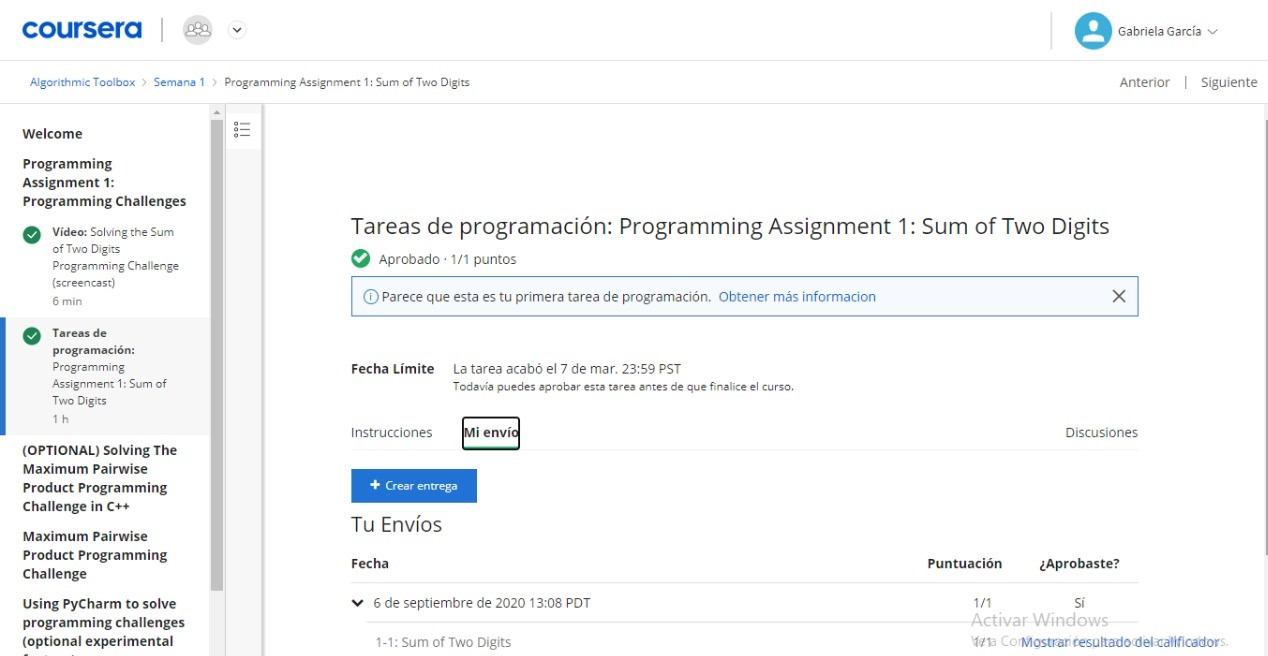

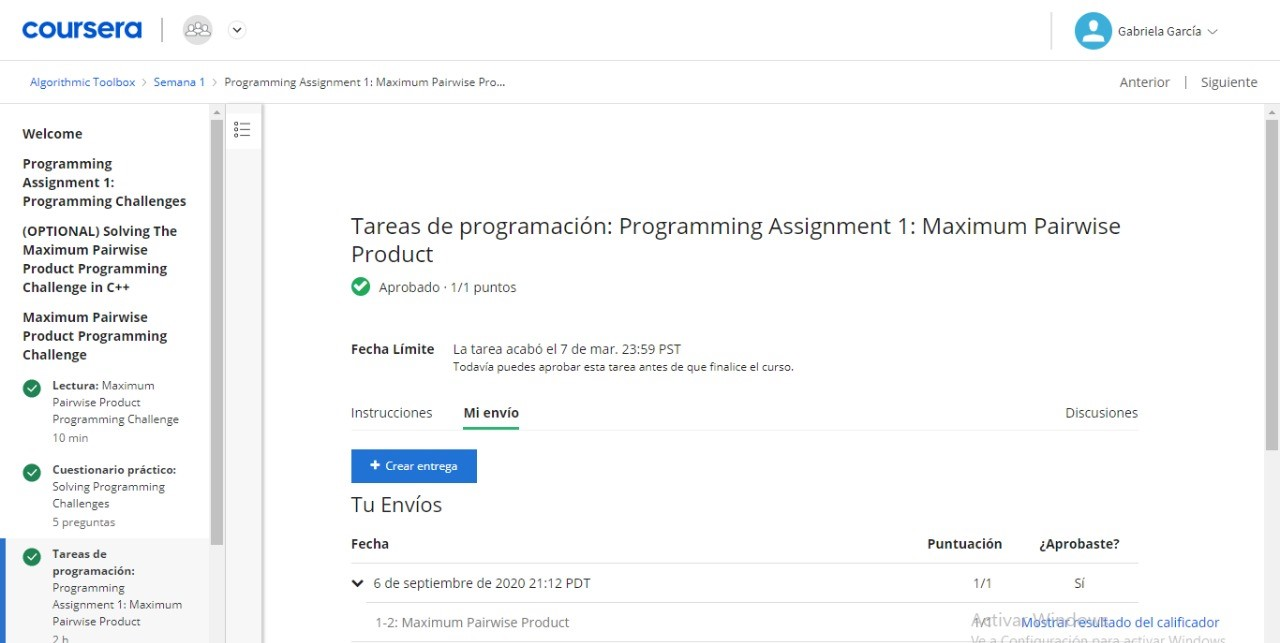